In [6]:
import pandas as pd
import numpy as np

# Carregar os dados sem cabeçalho
data = pd.read_csv('../data/artificial1d.csv', header=None)

# Verificar os dados
print(data.head())

# Gerar x como uma sequência de 1 até o número de linhas
x = np.arange(1, len(data) + 1)
y = data[0].values  # Usar a primeira coluna como y


          0         1
0 -1.000000 -2.082017
1 -0.931034 -1.326980
2 -0.862069 -1.105598
3 -0.793103 -0.873946
4 -0.724138 -0.285027


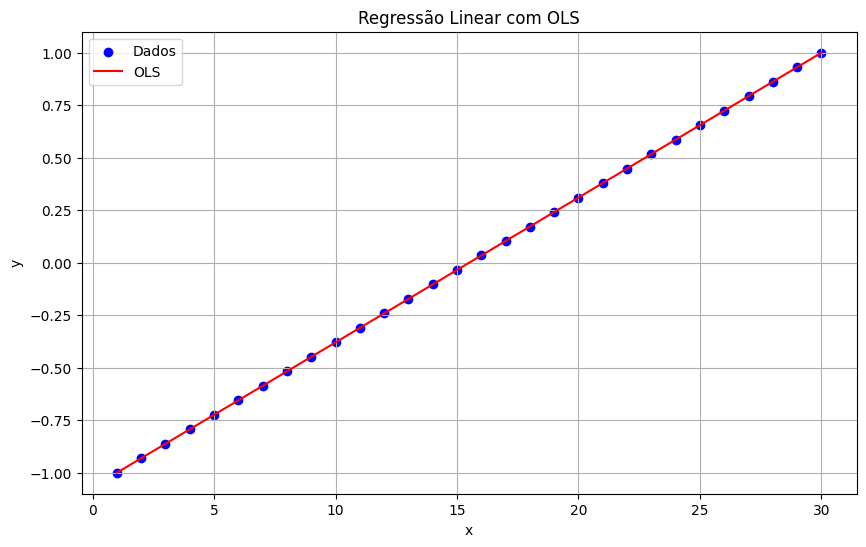

Parâmetros OLS: [-1.06896552  0.06896552]
MSE OLS: 1.0999627889043633e-31


In [3]:
# Regressão Linear com OLS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('../data/artificial1d.csv', header=None)
x = np.arange(1, len(data) + 1)  # Criar uma sequência de 1 a N para o eixo x
y = data[0].values               # Usar a coluna 0 como o eixo y

# Adiciona um termo de bias (intercepto)
X = np.vstack([np.ones(len(x)), x]).T  # Matriz X com coluna de 1s para o intercepto

# Calcula os parâmetros usando OLS conforme o slide: w = (X^T X)^-1 X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ y   # Parâmetros w0 e w1

# Previsões com os parâmetros OLS
y_pred = X @ w

# Calcular o erro quadrático médio (MSE) para avaliar o modelo
mse_ols = np.mean((y - y_pred) ** 2)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados', color='blue')
plt.plot(x, y_pred, label='OLS', color='red')
plt.title('Regressão Linear com OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Exibir os parâmetros e o MSE
print(f'Parâmetros OLS (w): {w}')
print(f'MSE OLS: {mse_ols}')


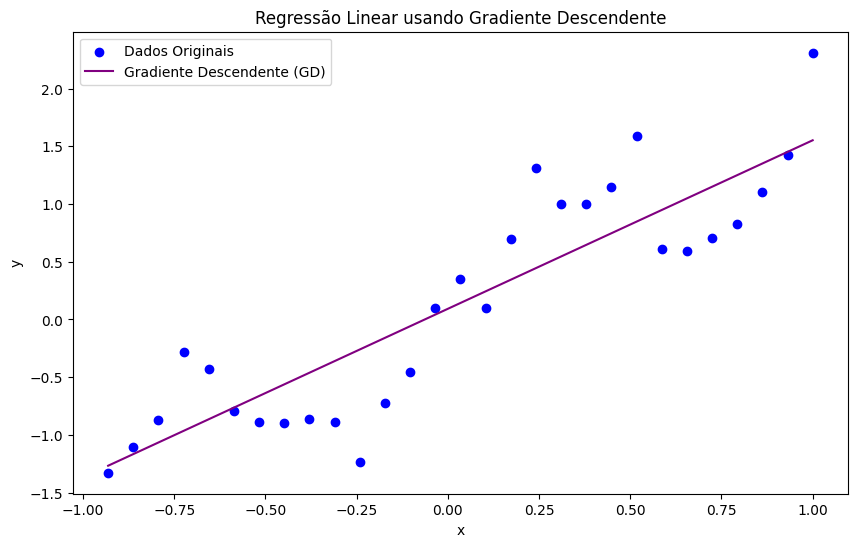

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('../data/artificial1d.csv')
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Adicionar uma coluna de 1s para o termo independente w0
X = np.c_[np.ones(x.shape[0]), x]

# Gradiente Descendente
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    N = len(y)
    theta = np.zeros(X.shape[1])
    mse_history = []

    for t in range(epochs):
        # Calcular as previsões
        y_pred = X @ theta
        
        # Calcular o erro
        errors = y - y_pred
        
        # Atualizar os parâmetros conforme a fórmula
        theta[0] += (learning_rate / N) * np.sum(errors)            # Atualiza w0
        theta[1] += (learning_rate / N) * np.sum(errors * X[:, 1])  # Atualiza w1
        
        # Calcular e armazenar o MSE (opcional)
        mse = np.mean(errors ** 2)
        mse_history.append(mse)

    return theta, mse_history

# Executar GD
theta_gd, mse_history_gd = gradient_descent(X, y)

# Previsões com GD
y_pred_gd = X @ theta_gd

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Dados Originais")
plt.plot(x, y_pred_gd, color="purple", label="Gradiente Descendente (GD)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear usando Gradiente Descendente")
plt.show()


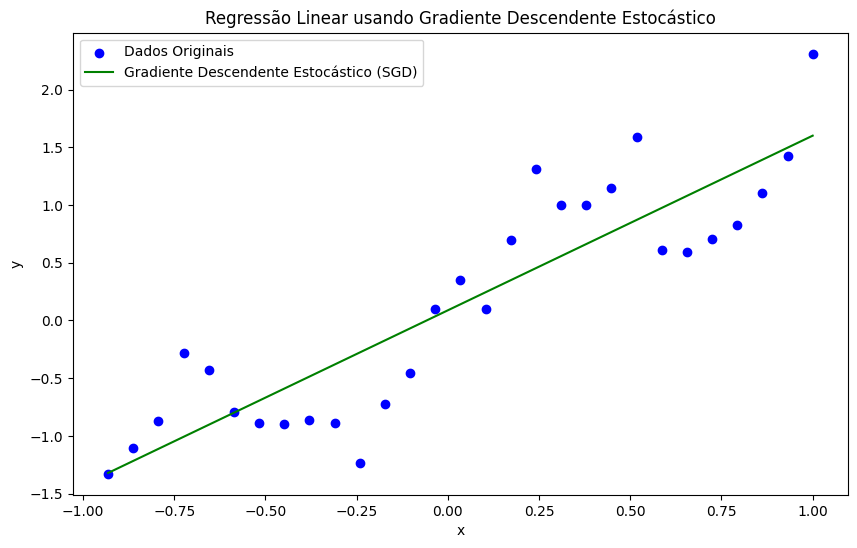

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('../data/artificial1d.csv')
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Adicionar uma coluna de 1s para o termo independente w0
X = np.c_[np.ones(x.shape[0]), x]

# Gradiente Descendente Estocástico
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    N = len(y)
    theta = np.zeros(X.shape[1])
    mse_history = []

    for epoch in range(epochs):
        # Permutação aleatória dos índices dos dados
        indices = np.random.permutation(N)
        
        for i in indices:
            # Selecionar um exemplo de entrada
            xi = X[i, :]
            yi = y[i]
            
            # Previsão para o exemplo selecionado
            y_pred = xi @ theta
            
            # Cálculo do erro
            error = yi - y_pred
            
            # Atualizar os parâmetros conforme a fórmula do slide
            theta[0] += learning_rate * error           # Atualiza w0
            theta[1] += learning_rate * error * xi[1]   # Atualiza w1

        # Opcional: calcular e armazenar o MSE após cada época
        mse = np.mean((X @ theta - y) ** 2)
        mse_history.append(mse)

    return theta, mse_history

# Executar SGD
theta_sgd, mse_history_sgd = stochastic_gradient_descent(X, y)

# Previsões com SGD
y_pred_sgd = X @ theta_sgd

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Dados Originais")
plt.plot(x, y_pred_sgd, color="green", label="Gradiente Descendente Estocástico (SGD)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear usando Gradiente Descendente Estocástico")
plt.show()


In [41]:
# Parâmetros de teste
learning_rate = 0.05  # Tente valores menores ou maiores
epochs = 5000  # Aumente para permitir mais iterações

# Executar SGD com parâmetros ajustados
theta_sgd, mse_history_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)
y_pred_sgd = X @ theta_sgd

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados', color='blue')

# Plotar a linha de regressão para SGD
plt.plot(x, y_pred_sgd, label='SGD', color='green')

plt.title('Regressão Linear com SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Exibir parâmetros e MSE
print(f'Parâmetros SGD: {theta_sgd}')
print(f'MSE SGD: {np.mean((y - y_pred_sgd) ** 2)}')


KeyError: 'x'